In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AIML prep/Assignments/LinearRegression/day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'Light snow', 4: 'Heavy Rain'})
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [6]:
encoded_df = pd.get_dummies(df, columns = ['weathersit', 'season'], dtype = int)

In [7]:
encoded_df.drop(columns = ['dteday'], inplace = True)
encoded_df.drop(columns = ['instant'], inplace = True)

In [8]:
encoded_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Light snow,weathersit_clear,weathersit_mist,season_fall,season_spring,season_summer,season_winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,1,0,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0,1,0,0


In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

encoded_df = pd.DataFrame(minmax.fit_transform(encoded_df), columns = encoded_df.columns)
encoded_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_Light snow,weathersit_clear,weathersit_mist,season_fall,season_spring,season_summer,season_winter
0,0.0,0.0,0.0,1.000000,0.0,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.166667,1.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.333333,1.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.500000,1.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [10]:
y = encoded_df['cnt']
x = encoded_df.drop('cnt', axis = 1)
x.shape, y.shape

((730, 18), (730,))

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)
x_train.shape, y_train.shape

((584, 18), (584,))

In [12]:
x_test.shape, y_test.shape

((146, 18), (146,))

In [13]:
import numpy as np

class LinearRegression():
  def __init__(self, learning_rate=0.01, iterations=5):
    self.learning_rate=learning_rate
    self.iterations=iterations


In [14]:
def predict(self, x):
  return np.dot(x, self.W)+self.b

LinearRegression.predict=predict

In [15]:
def r2_score(self, x, y):
  y_=predict(self, x)
  ss_res=np.sum((y-y_)**2)
  ss_tot=np.sum((y-y.mean())**2)
  r2=(1-ss_res/ss_tot)
  return r2

LinearRegression.r2_score=r2_score

In [16]:
def update_weights(self):
  y_pred=self.predict(self.x)
  dW = - (2*(self.x.T).dot(y-y_pred))/self.m
  db = 2*np.sum(y-y_pred)/self.m
  self.W = self.W - self.learning_rate * dW
  self.b = self.b - self.learning_rate * db
  return self

LinearRegression.update_weights=update_weights


In [17]:
def fit(self, X, Y):
  # no_of_training_examples, no_of_features
  self.m, self.d = X.shape
  # weight initialization
  self.W = np.zeros(self.d)
  self.b = 0
  self.x = x
  self.y = y
  self.error_list=[]
  # gradient descent learning
  for i in range(self.iterations):
    self.update_weights()
    Y_pred=X.dot(self.W)+self.b
    error=np.square(np.subtract(Y,Y_pred)).mean()
    self.error_list.append(error)
  return self

LinearRegression.fit=fit

In [18]:
lr = LinearRegression(iterations=100)
lr.fit(x_train, y_train)

In [19]:
lr.predict(x_test)

array([0.40383031, 0.44309477, 0.51973302, 0.74615146, 0.65868487,
       0.64625813, 0.66709904, 0.54661918, 0.63459887, 0.53859012,
       0.2694131 , 0.26403893, 0.07573102, 0.45947697, 0.71188349,
       0.62494316, 0.58822197, 0.73099749, 0.75555936, 0.64803349,
       0.27340729, 0.72522833, 0.3080056 , 0.63161846, 0.5546111 ,
       0.42816939, 0.62725001, 0.82041635, 0.79354093, 0.35655806,
       0.22967533, 0.84856056, 0.34929562, 0.49004234, 0.81143643,
       0.49348698, 0.17080123, 0.47880915, 0.43762885, 0.32024809,
       0.34593562, 0.79724608, 0.4466194 , 0.46998453, 0.53278849,
       0.58549197, 0.54169636, 0.5746758 , 0.38557079, 0.4628779 ,
       0.37615853, 0.49888928, 0.53795066, 0.13963869, 0.28284765,
       0.33957352, 0.23606501, 0.76535096, 0.39183058, 0.19641635,
       0.66863987, 0.31331065, 0.59559837, 0.34052454, 0.41489312,
       0.40064367, 0.61534035, 0.47162358, 0.25221231, 0.38011654,
       0.83533602, 0.56075601, 0.66320965, 0.23072124, 0.72802

In [20]:
lr.r2_score(x_test, y_test)

0.8545031341810567

In [21]:
lr.W

yr                       0.152590
mnth                     0.099784
holiday                  0.005297
weekday                  0.082857
workingday               0.090216
temp                     0.126761
atemp                    0.121014
hum                      0.113842
windspeed                0.052588
casual                   0.091587
registered               0.144294
weathersit_Light snow   -0.007663
weathersit_clear         0.139021
weathersit_mist          0.055323
season_fall              0.066628
season_spring            0.000369
season_summer            0.069318
season_winter            0.050366
dtype: float64

In [22]:
lr.b

-0.186680837801705

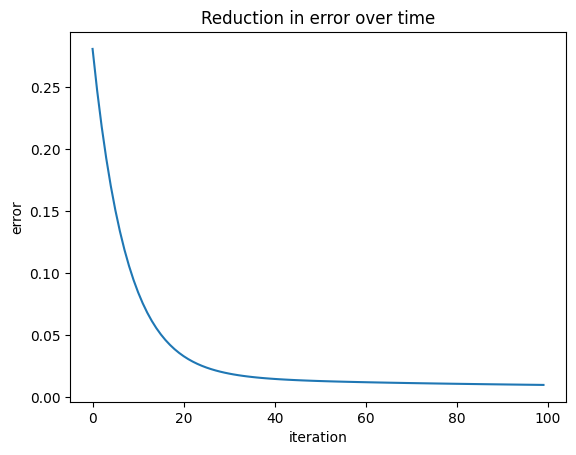

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title('Reduction in error over time')
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

In [24]:
Adj_R = 1 - (1-lr.r2_score(x_test, y_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9756138146161671


In [25]:
import statsmodels.api as sm

x_sm = sm.add_constant(x_train)
sm_model=sm.OLS(y_train, x_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.138e+30
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:10:06   Log-Likelihood:                 19223.
No. Observations:                 584   AIC:                        -3.841e+04
Df Residuals:                     567   BIC:                        -3.834e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.985e-

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
vif = pd.DataFrame()
X_t = pd.DataFrame(x_train, columns=x_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
17,season_winter,inf
11,weathersit_Light snow,inf
16,season_summer,inf
15,season_spring,inf
14,season_fall,inf
13,weathersit_mist,inf
12,weathersit_clear,inf
5,temp,60.38
6,atemp,55.68
10,registered,6.31


In [28]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(x_train, columns=x_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.255e+30
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:10:06   Log-Likelihood:                 19252.
No. Observations:                 584   AIC:                        -3.847e+04
Df Residuals:                     567   BIC:                        -3.840e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.013e-

In [29]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['season_winter']
while True:
  vif = pd.DataFrame()
  X_t = pd.DataFrame(x_train, columns=x_train.columns)[cols2]
  vif['Features'] = cols2
  vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)

  cols2 = vif["Features"][1:].values
  X2 = pd.DataFrame(x_train, columns=x_train.columns)[cols2]

  X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
  sm_model = sm.OLS(list(y_train), X2_sm).fit()
  if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
    print('Reached threshold')
    print('Highest vif:',vif.iloc[0])
    print('Current adj.R2',sm_model.rsquared_adj)
    print('Features removed:', i)
    print('List of features removed:', feats_removed)
    break
  feats_removed.append(vif.iloc[0]['Features'])
  i += 1

Reached threshold
Highest vif: Features    windspeed
VIF              4.52
Name: 1, dtype: object
Current adj.R2 0.8817783946909898
Features removed: 7
List of features removed: ['season_winter', 'weathersit_clear', 'temp', 'registered', 'atemp', 'hum', 'mnth']


In [30]:
print(vif)
print(sm_model.summary())

                 Features   VIF
1               windspeed  4.52
0                  casual  4.13
2              workingday  3.53
4                 weekday  3.15
3           season_summer  2.40
6             season_fall  2.39
7                      yr  2.30
5           season_spring  1.94
8         weathersit_mist  1.47
10  weathersit_Light snow  1.09
9                 holiday  1.08
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     435.8
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          2.66e-260
Time:                        03:10:07   Log-Likelihood:                 685.47
No. Observations:                 584   AIC:                            -1349.
Df Residuals:                     573   BIC:                   

In [32]:
x_sm = sm.add_constant(x_train)
sm_model = sm.OLS(y_train, x_sm).fit()

In [33]:
Y_hat = sm_model.predict(x_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

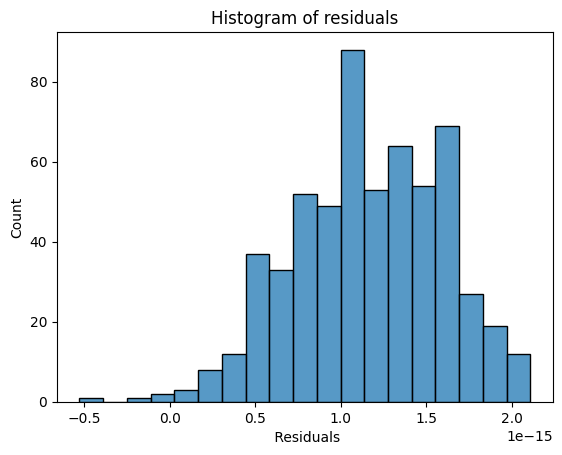

In [34]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [36]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic


0.9892138838768005

In [37]:
Y_hat = sm_model.predict(x_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

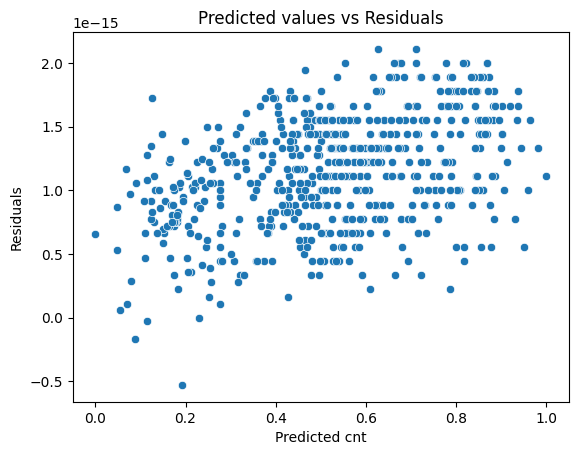

In [39]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("Predicted cnt")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

In [43]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 0.9842117794857255), ('p-value', 0.553008425567074)]

In [45]:
# p-value shows we accept null hypothesis of homoscedasticity, and there is no signs of heteroscedasticity in the data.
# F statistic shows there is minimal difference in variance between groups
# If we check for all variables then the values might change.